In [ ]:
# Notebook for debugging the pipline

In [9]:
import os
from annabell_utilities import AnnabellLogfileInterpreter
from pipeline import Pipeline
import pandas as pd
import logging
from config.global_config import GlobalConfig

global_config = GlobalConfig()
logging.disable(logging.CRITICAL)
base_dir = global_config.get_experiments_directory()
experiment_name = "50"
json_path = base_dir + f"/{experiment_name}/data_sets/nyc_squad_with_pretraining_commands.jsonl"
pipeline = Pipeline(prepared_dataset_filepath=json_path)
pipeline.load_prepared_dataset(json_path)
log_dir = base_dir + f"/{experiment_name}/logs"
log_filename = "annabell_pre_training_log.txt"
log_filepath = os.path.join(log_dir, log_filename)
log_filepath = base_dir + f"/{experiment_name}/logs/annabell_pre_training_log.txt"
interpreter = AnnabellLogfileInterpreter(log_filepath)
interpreter.parse_entries()

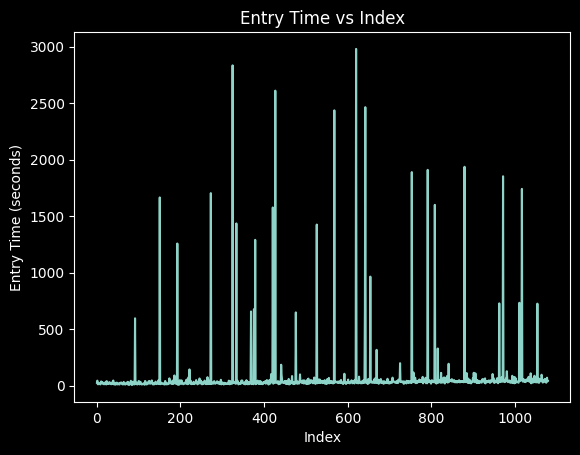

In [5]:
#create a graph of entry time vs index
plt = interpreter.plot_entry_time_vs_sample_number()
plt.show()

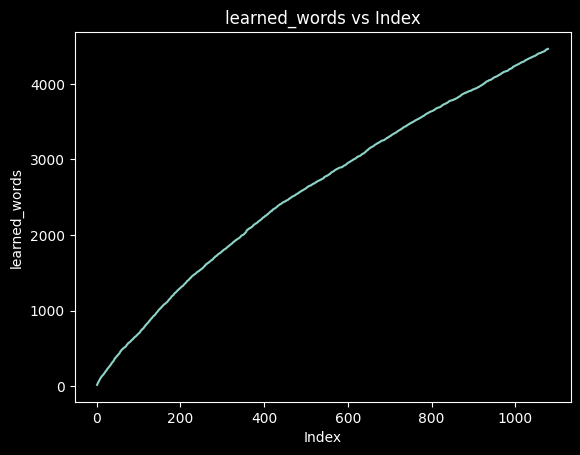

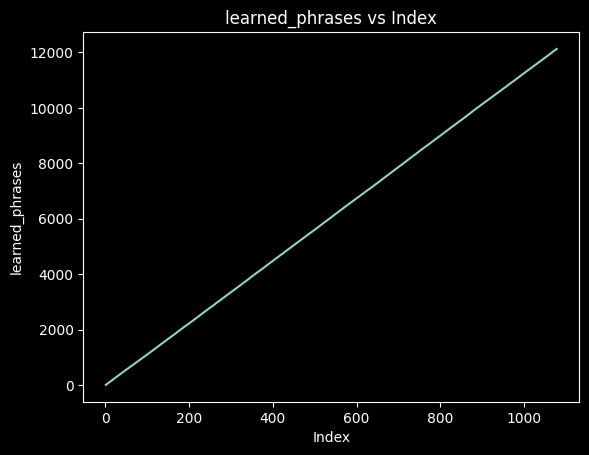

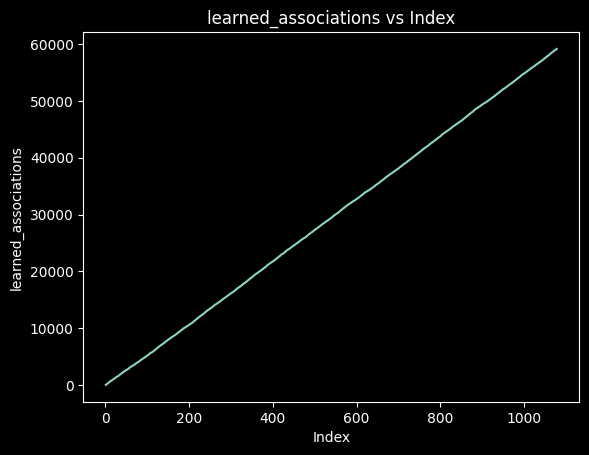

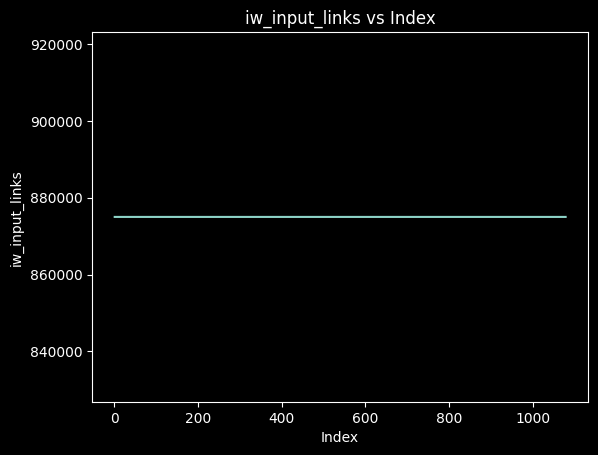

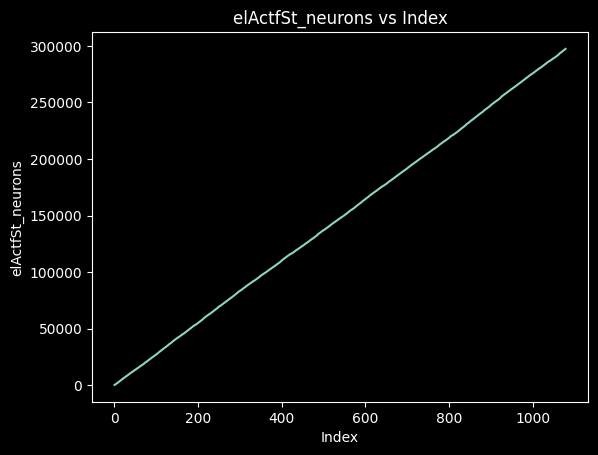

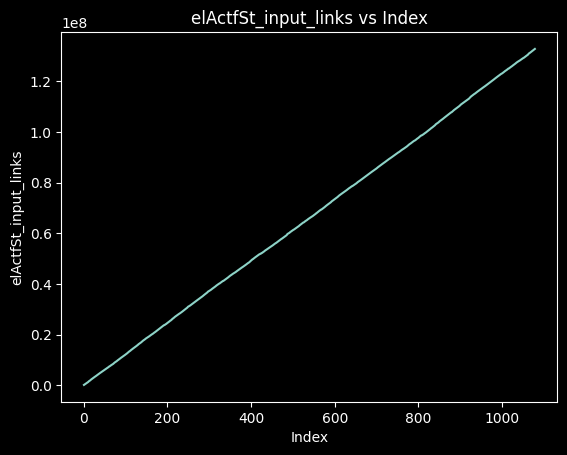

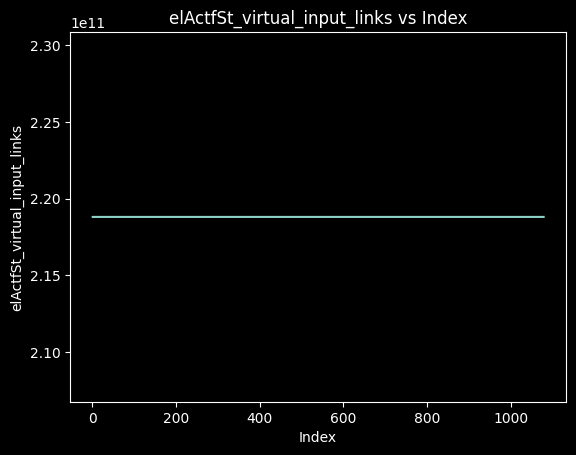

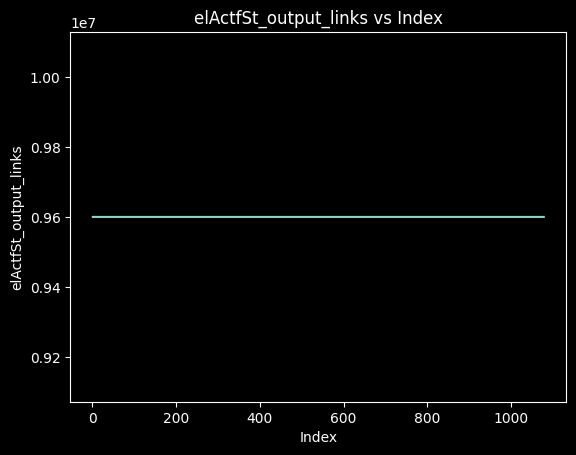

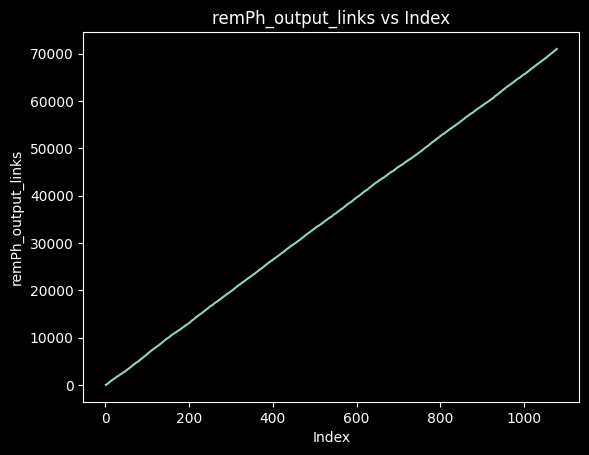

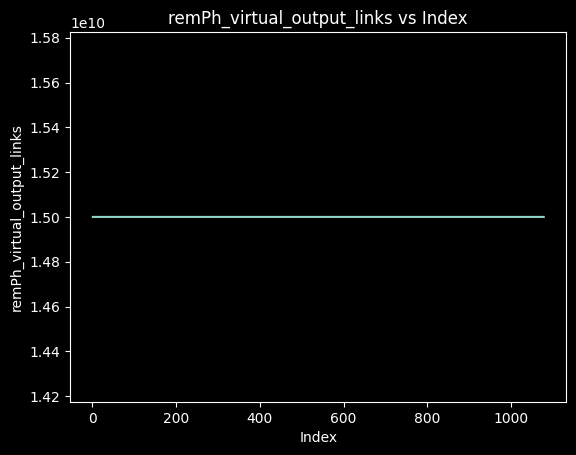

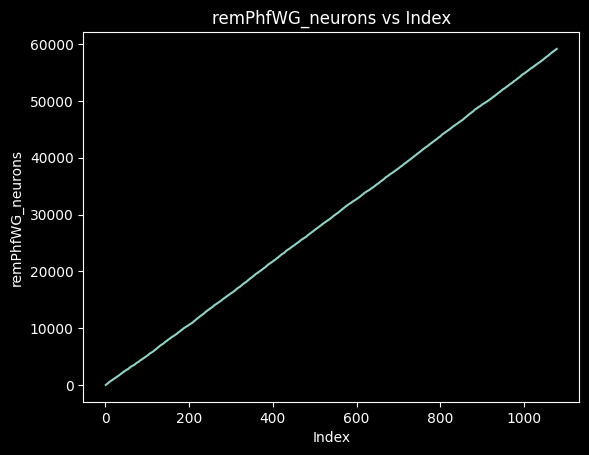

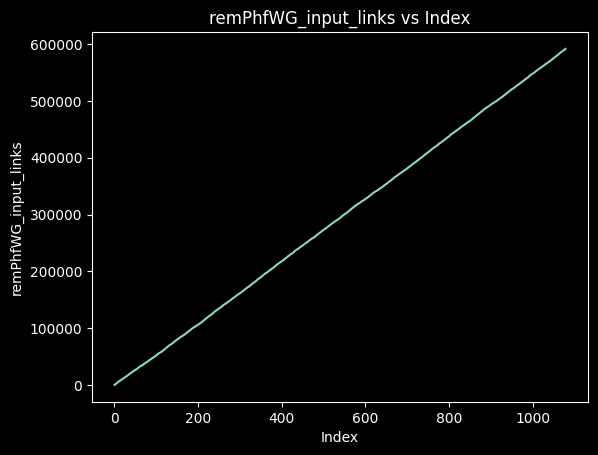

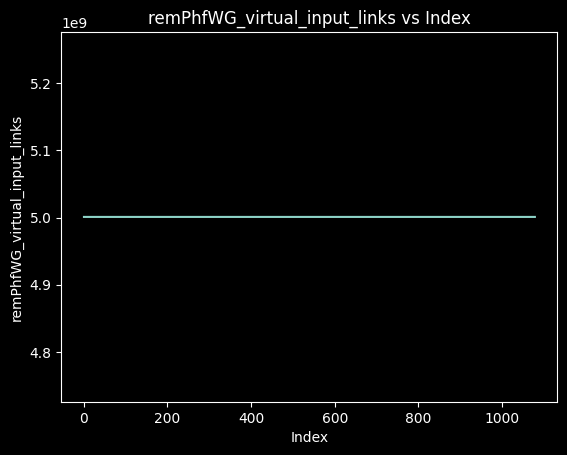

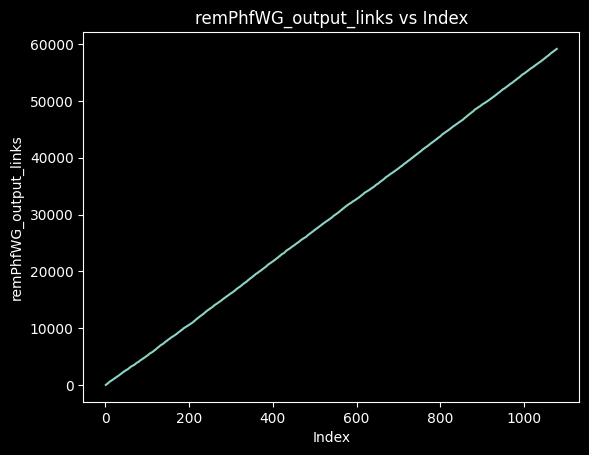

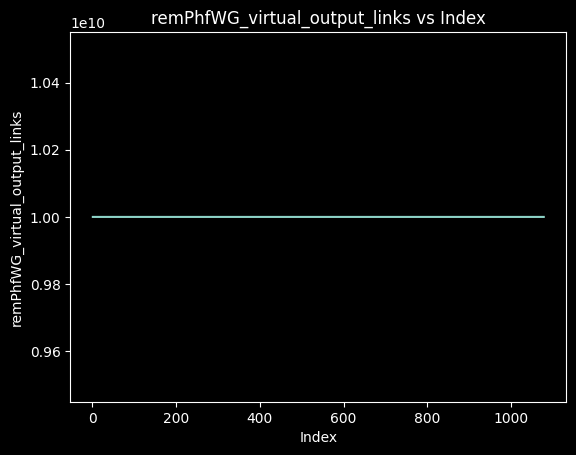

In [6]:
#plot a graph showing each stat measure vs index
for plt in interpreter.plot_stat_measures_vs_index():
    plt.show()

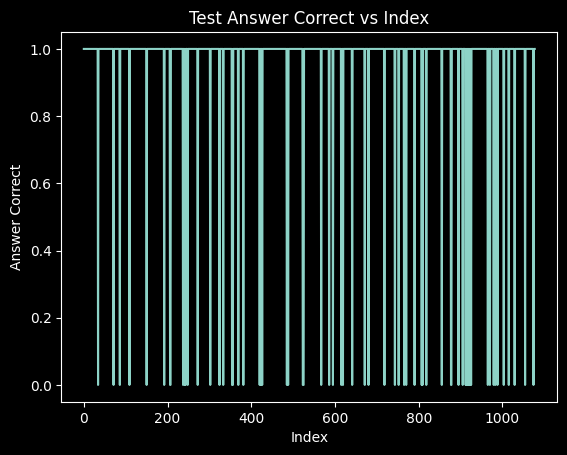

In [8]:
#plot a graph showing "test_answer_correct" vs index

def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"])
    plt.xlabel("Index")
    plt.ylabel("Answer Correct")
    plt.title("Test Answer Correct vs Index")
    plt.show()


df_from_results = pd.read_csv(
    base_dir + f"/{experiment_name}/pre_training/results/test_detailed_results_tsv",
    sep='\t')
plot_test_answer_correct(df_from_results)

In [10]:
#sum the number of distinct words in all of the pre-training commands in the dataset
def count_distinct_words_in_pre_training_commands(the_dataset, up_to_index):
    distinct_words = set()
    for the_index, the_row in the_dataset.iterrows():
        if the_index > up_to_index:
            break
        dec_statement = the_row["declarative_statement_formatted"]
        question = the_row["question_formatted"]
        d_words = dec_statement.split()
        q_words = question.split()
        words = d_words + q_words
        distinct_words.update(words)
    return len(distinct_words)


num_distinct_words = count_distinct_words_in_pre_training_commands(df_from_results, up_to_index=len(df_from_results))
print(f"Number of distinct words in pre-training commands: {num_distinct_words}")

Number of distinct words in pre-training commands: 4463


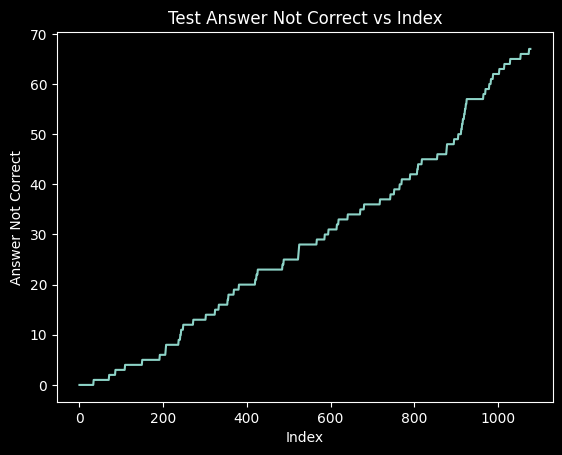

In [11]:
#plot a graph showing sum of "test_answer_correct" == false vs index

def plot_test_answer_correct(the_df):
    plt.plot(the_df.index, the_df["test_answer_correct"].apply(lambda x: 0 if x else 1).cumsum())
    plt.xlabel("Index")
    plt.ylabel("Answer Not Correct")
    plt.title("Test Answer Not Correct vs Index")
    plt.show()


plot_test_answer_correct(df_from_results)

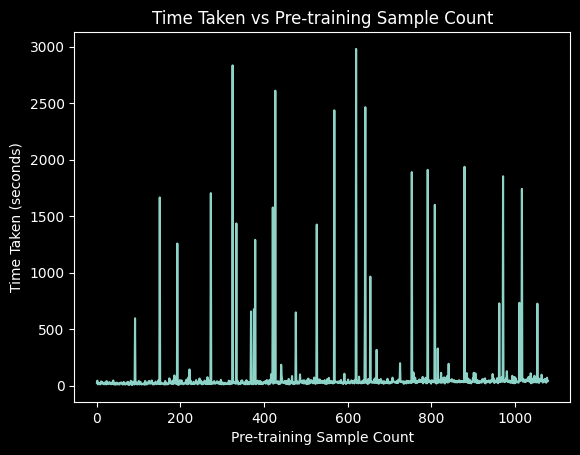

In [12]:
    #using the logfile intepreter, plot a graph of the time taken for each pre-training sample vs the count of the sample
import matplotlib.pyplot as plt


def plot_time_taken_vs_sample_count(the_interpreter):
    sample_counts = []
    time_taken = []
    for entry in the_interpreter.entries:
        sample_counts.append(entry.sample_number())
        time_taken.append(entry.time())
    plt.plot(sample_counts, time_taken)
    plt.xlabel("Pre-training Sample Count")
    plt.ylabel("Time Taken (seconds)")
    plt.title("Time Taken vs Pre-training Sample Count")
    plt.show()


plot_time_taken_vs_sample_count(interpreter)


In [13]:
#find the row with id = "56d4eb762ccc5a1400d8334f"
dataframe = pipeline.datasetPreProcessor.dataset
dataframe[dataframe[
              'id'] == "570a826e6d058f1900182eeb"]

,id,title,context,question,declarative_statement,answer,question_category,statement_category


In [16]:
pre_1000_entry = interpreter.entries[184]
print(
    f"Sample number: {pre_1000_entry.sample_number()}, Learned Words: {pre_1000_entry.learned_words()}, Time: {pre_1000_entry.time()} seconds")
post_1000_entry = interpreter.entries[189]
print(
    f"Sample number: {post_1000_entry.sample_number()}, Learned Words: {post_1000_entry.learned_words()}, Time: {post_1000_entry.time()} seconds")

Sample number: 185, Learned Words: 981, Time: 13.25336199999947 seconds
Sample number: 190, Learned Words: 1000, Time: 18.794857000000775 seconds


In [10]:
dataframe = pipeline.datasetPreProcessor.dataset
#take a random sample of 5 rows form the dataset
indices = [1000, 2000, 3000, 4000, 5000]

examples = []
for index in indices:
    row = dataframe.iloc[index]
    prompt_example = f"EXAMPLE:\n\n\"question\":\"{row["question"]}\", \"answer\":\"{row["answer"]}\"\n\nResponse:\n\n\"\""
    examples.append(prompt_example)
examples


['EXAMPLE:\n\n"question":"What is the official language of Montana?", "answer":"English"\n\nResponse:\n\n""',
 'EXAMPLE:\n\n"question":"What year did the 5th Dalai lama start to dominate over Tibet?", "answer":"1642"\n\nResponse:\n\n""',
 'EXAMPLE:\n\n"question":"Where did a cargo train derail as a result?", "answer":"Hui County, Gansu"\n\nResponse:\n\n""',
 'EXAMPLE:\n\n"question":"What New York street is associated with fashion?", "answer":"Seventh Avenue"\n\nResponse:\n\n""',
 'EXAMPLE:\n\n"question":"What type of language is Portuguese?", "answer":"Romance"\n\nResponse:\n\n""']

In [36]:
commands = ['#id: 57338724d058e614000b5c9f',
            'before adopt national standard Notre_Dame emphasize scholastic and classical', 'education',
            '#END OF DECLARATION', '\n', '? what type of education be push at Notre_Dame',
            'before its embracing of national standard', '#END OF QUESTION',
            '.sctx ? what type of education be push at Notre_Dame', '.pg education', '.pg Notre_Dame',
            '.sctx before its embracing of national standard', '.wg national standard', '.ggp',
            '.ph before adopt national standard Notre_Dame emphasize scholastic and classical', '.drop_goal',
            '.drop_goal', '.wg scholastic and classical', '.rw', '\n', '#END OF COMMANDS', '.time', '#END OF TIME',
            '.stat', '#END OF STATS']
for command in commands:
    print(command)

#id: 57338724d058e614000b5c9f
before adopt national standard Notre_Dame emphasize scholastic and classical
education
#END OF DECLARATION


? what type of education be push at Notre_Dame
before its embracing of national standard
#END OF QUESTION
.sctx ? what type of education be push at Notre_Dame
.pg education
.pg Notre_Dame
.sctx before its embracing of national standard
.wg national standard
.ggp
.ph before adopt national standard Notre_Dame emphasize scholastic and classical
.drop_goal
.drop_goal
.wg scholastic and classical
.rw


#END OF COMMANDS
.time
#END OF TIME
.stat
#END OF STATS


In [8]:
df = pd.read_json(json_path, lines=True)
#add a column called "is_pre_training" and set it to false
df["is_pretraining"] = False

pre_training_ids = ()
commands_file_path = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/38/pre_training/nyc_squad_pretraining_commands.txt"
with open(commands_file_path, 'r') as commands_file:
    lines = commands_file.readlines()
    for line in lines:
        if line.startswith("#id:"):
            pre_training_ids += (line.split("#id: ")[1].strip(),)
#mark the rows in the dataframe with the pre-training ids as is_pre_training = true
df.loc[df['id'].isin(pre_training_ids), 'is_pretraining'] = True
#write the df to a file called "nyc_squad_with_pretraining_flags.jsonl" in the same directory as the original json file
output_json_path = json_path.replace("nyc_squad_with_pretraining_commands.jsonl",
                                     "nyc_squad_with_pretraining_flags.jsonl")
df.to_json(output_json_path, orient='records', lines=True)
print(f"Output JSON with pre-training flags written to: {output_json_path}")

Output JSON with pre-training flags written to: /Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/annabell/experiments/38/data_sets/nyc_squad_with_pretraining_flags.jsonl


In [ ]:
from pipeline import Pipeline
import pandas as pd

pipeline = Pipeline(prepared_dataset_filepath=None)
base_path_mac = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD"
experiment_name = "49"
json_path = base_path_mac + f"/work/annabell/experiments/{experiment_name}/data_sets/squad_dataset_with_generated_sentences.jsonl"
pipeline.declarative_sentences_dataset = pd.read_json(json_path, lines=True)
pipeline.preprocess_dataset()
#pipeline.datasetPreProcessor.create_commands_for_pretraining()
#pipeline.run_pre_training_evaluation_testing()
#pipeline.run_evaluate_pre_training_results()
#pipeline.run_training()
#pipeline.run_testing()
#pipeline.run_evaluate_training_results()

In [3]:
#find the row with id = "56d4eb762ccc5a1400d8334f"
dataframe = pipeline.declarative_sentences_dataset
debug_df = dataframe[dataframe['id'] == "572ebc4803f98919007569b8"]
debug_df


,id,title,context,question,declarative_statement,answer
2230,572ebc4803f98919007569b8,Muammar_Gaddafi,"Many teachers at Sabha were Egyptian, and for ...",Name one event that occurred in the Arab world...,None,"1948 Arab–Israeli War, the Egyptian Revolution..."


In [1]:
import pandas as pd

xml_file_path = "/Users/chris/Library/CloudStorage/GoogleDrive-cjameswalmsley@gmail.com/My Drive/Shared with Julia/Education/Kent University/PhD/work/datasets/full database.xml"
# 1. Simple load
df = pd.read_xml(xml_file_path)
df

ERROR! Session/line number was not unique in database. History logging moved to new session 359


,type,created,updated,drugbank-id,name,description,cas-number,unii,state,groups,...,snp-adverse-drug-reactions,targets,enzymes,carriers,transporters,fda-label,msds,average-mass,monoisotopic-mass,calculated-properties
0,biotech,2005-06-13,2025-11-04,BIOD00024,Lepirudin,Lepirudin is a recombinant hirudin formed by 6...,138068-37-8,Y43GF64R34,solid,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None
1,biotech,2005-06-13,2025-12-04,BIOD00071,Cetuximab,Cetuximab is a recombinant chimeric human/mous...,205923-56-4,PQX0D8J21J,liquid,\n,...,None,\n,None,None,None,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,NaN,NaN,None
2,biotech,2005-06-13,2025-11-04,BIOD00001,Dornase alfa,Dornase alfa is a biosynthetic form of human d...,143831-71-4,953A26OA1Y,liquid,\n,...,None,\n,None,None,None,//s3-us-west-2.amazonaws.com/drugbank/fda_labe...,//s3-us-west-2.amazonaws.com/drugbank/msds/DB0...,NaN,NaN,None
3,biotech,2005-06-13,2025-11-04,BIOD00084,Denileukin diftitox,Denileukin diftitox is an IL2-receptor-directe...,173146-27-5,25E79B5CTM,liquid,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None
4,biotech,2005-06-13,2025-11-04,BIOD00052,Etanercept,Dimeric fusion protein consisting of the extra...,185243-69-0,OP401G7OJC,liquid,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19825,small molecule,2025-11-19,2026-01-03,DB31698,R-(-)-Gossypol acetic acid,None,866541-93-7,U9GNI6VT5N,None,\n,...,None,None,None,None,None,None,None,578.614,578.215197,\n
19826,small molecule,2025-11-19,2026-01-03,DB31699,Gossypol acetic acid,None,5453-04-3,S7RL72610R,None,\n,...,None,None,None,None,None,None,None,578.614,578.215197,\n
19827,small molecule,2025-11-26,2026-01-03,DB31734,FRAX597,FRAX597 is a small molecule drug that inhibits...,1286739-19-2,None,None,\n,...,None,\n,None,None,None,None,None,558.100,557.176457,\n
19828,small molecule,2025-12-01,2025-12-04,DB31795,FRAX716,FRAX716 is a group I-specific p21-activated ki...,1432908-40-1,None,None,\n,...,None,\n,None,None,None,None,None,NaN,NaN,None


In [11]:
#Slurm info dataset (obtained by running: sinfo output)

import pandas as pd
import io

terminal_data = """HOSTNAMES     STATE    CPUS S:C:T    CPUS(A/I/O/T)   CPU_LOAD MEMORY   GRES              PARTITION          AVAIL_FEATURES
legacy29      idle     8    1:4:2    0/8/0/8         0.03     15821    (null)            test*              avx
cpu01         mix      32   2:8:2    6/26/0/32       0.15     192034   (null)            cpu                avx
cpu02         mix      32   2:8:2    8/24/0/32       0.04     192034   (null)            cpu                avx
cpu03         mix      32   2:8:2    2/30/0/32       0.06     192034   (null)            cpu                avx
cloud01       idle     8    8:1:1    0/8/0/8         0.02     15991    (null)            cpu                avx
cloud02       idle     8    8:1:1    0/8/0/8         0.04     15991    (null)            cpu                avx
cloud03       idle     8    8:1:1    0/8/0/8         0.04     15991    (null)            cpu                avx
cloud04       idle     8    8:1:1    0/8/0/8         0.08     15991    (null)            cpu                avx
cloud05       idle     8    8:1:1    0/8/0/8         0.07     15991    (null)            cpu                avx
cloud06       idle     8    8:1:1    0/8/0/8         0.03     15991    (null)            cpu                avx
legacy24      idle     80   4:10:2   0/80/0/80       0.18     257860   (null)            cpu                avx
legacy25      idle     24   2:6:2    0/24/0/24       0.08     15789    gpu:kepler:2      cpu                avx
legacy26      idle     8    1:4:2    0/8/0/8         0.14     15821    (null)            cpu                avx
legacy27      idle     8    1:4:2    0/8/0/8         0.02     15821    (null)            cpu                avx
legacy28      idle     8    1:4:2    0/8/0/8         0.12     15821    (null)            cpu                avx
legacy30      idle     16   1:8:2    0/16/0/16       0.02     64079    (null)            cpu                avx
legacy31      idle     16   1:8:2    0/16/0/16       0.05     64079    (null)            cpu                avx
ampere01      mix      48   2:12:2   8/40/0/48       4.72     386020   gpu:ampere:4      gpu.high           avx
ampere02      mix      48   2:12:2   8/40/0/48       8.65     386148   gpu:ampere:4      gpu.high           avx
ampere03      mix      48   2:12:2   6/42/0/48       3.91     386148   gpu:ampere:4      gpu.high           avx
pascal01      mix      48   2:12:2   2/46/0/48       0.02     257549   gpu:pascal:2      gpu.high           avx
volta01       mix      24   2:6:2    2/22/0/24       6.93     144940   gpu:volta:1       gpu.high           avx
pascal02      idle     48   2:12:2   0/48/0/48       0.04     257549   gpu:pascal:2      gpu.high           avx
ampere01      mix      48   2:12:2   8/40/0/48       4.72     386020   gpu:ampere:4      gpu                avx
ampere02      mix      48   2:12:2   8/40/0/48       8.65     386148   gpu:ampere:4      gpu                avx
ampere03      mix      48   2:12:2   6/42/0/48       3.91     386148   gpu:ampere:4      gpu                avx
pascal01      mix      48   2:12:2   2/46/0/48       0.02     257549   gpu:pascal:2      gpu                avx
volta01       mix      24   2:6:2    2/22/0/24       6.93     144940   gpu:volta:1       gpu                avx
pascal02      idle     48   2:12:2   0/48/0/48       0.04     257549   gpu:pascal:2      gpu                avx
ampere01      mix      48   2:12:2   8/40/0/48       4.72     386020   gpu:ampere:4      gpu.stu            avx
ampere02      mix      48   2:12:2   8/40/0/48       8.65     386148   gpu:ampere:4      gpu.stu            avx
ampere03      mix      48   2:12:2   6/42/0/48       3.91     386148   gpu:ampere:4      gpu.stu            avx
pascal01      mix      48   2:12:2   2/46/0/48       0.02     257549   gpu:pascal:2      gpu.stu            avx
volta01       mix      24   2:6:2    2/22/0/24       6.93     144940   gpu:volta:1       gpu.stu            avx
pascal02      idle     48   2:12:2   0/48/0/48       0.04     257549   gpu:pascal:2      gpu.stu            avx
ampere01      mix      48   2:12:2   8/40/0/48       4.72     386020   gpu:ampere:4      gpu.low            avx
ampere02      mix      48   2:12:2   8/40/0/48       8.65     386148   gpu:ampere:4      gpu.low            avx
ampere03      mix      48   2:12:2   6/42/0/48       3.91     386148   gpu:ampere:4      gpu.low            avx
pascal01      mix      48   2:12:2   2/46/0/48       0.02     257549   gpu:pascal:2      gpu.low            avx
volta01       mix      24   2:6:2    2/22/0/24       6.93     144940   gpu:volta:1       gpu.low            avx
pascal02      idle     48   2:12:2   0/48/0/48       0.04     257549   gpu:pascal:2      gpu.low            avx
kepler01      idle     12   1:6:2    0/12/0/12       0.13     15903    gpu:kepler:1      oldgpu             avx
legacy25      idle     24   2:6:2    0/24/0/24       0.08     15789    gpu:kepler:2      oldgpu             avx
"""

dataframe = pd.read_csv(io.StringIO(terminal_data), delim_whitespace=True)
node_list = dataframe["HOSTNAMES"].unique().tolist()
node_list_formatted = [f' -"{hostname}"' for hostname in node_list]
for hostname in node_list:
    print("\t" + "- " + '"' + hostname + '"')

	- "legacy29"
	- "cpu01"
	- "cpu02"
	- "cpu03"
	- "cloud01"
	- "cloud02"
	- "cloud03"
	- "cloud04"
	- "cloud05"
	- "cloud06"
	- "legacy24"
	- "legacy25"
	- "legacy26"
	- "legacy27"
	- "legacy28"
	- "legacy30"
	- "legacy31"
	- "ampere01"
	- "ampere02"
	- "ampere03"
	- "pascal01"
	- "volta01"
	- "pascal02"
	- "kepler01"


/var/folders/cv/z7xz0c3n3nd4c26hj7g01n7w0000gn/T/ipykernel_51644/2787347382.py:52: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(io.StringIO(terminal_data), delim_whitespace=True)


In [ ]:
import pandas as pd

# 2. Specificity with XPath
# If the data is nested deeper, use XPath to point to the rows
df = pd.read_xml(
    'transactions.xml',
    xpath=".//transaction"  # Tells Pandas: "Treat every <transaction> as a row"
)

print(df.head())

/var/folders/cv/z7xz0c3n3nd4c26hj7g01n7w0000gn/T/ipykernel_18325/1881739798.py:4: FutureWarning: Passing literal xml to 'read_xml' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_xml(


AssertionError: 

AssertionError: 